In [19]:
import pandas as pd 
import numpy as np
#Read the data
dt=pd.read_csv('drive/My Drive/term.csv')
#print column names of term.csv
print(dt.columns)
#check number of columns
print(len(dt))
#check if there is null data
a=dt.isna().sum()
print(a)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')
40000
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64


In [20]:
#drop target variable to get independent variables
X=dt.drop(['y'],axis=1)
#check descriptive stat of numerical variables
dt.describe()



,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [21]:
#get dummies of variable if it is categorical
X_train=pd.get_dummies(X)
#check if it is correct
print(X_train.head())
#create target variable by transforming categoric variable of yes and no to binary variable
dt['y_train']=np.where(dt['y']=='yes',1,0)
y_train=dt['y_train']
dt['y_train'].describe()

   age  balance  day  duration  ...  month_mar  month_may  month_nov  month_oct
0   58     2143    5       261  ...          0          1          0          0
1   44       29    5       151  ...          0          1          0          0
2   33        2    5        76  ...          0          1          0          0
3   47     1506    5        92  ...          0          1          0          0
4   33        1    5       198  ...          0          1          0          0

[5 rows x 44 columns]


count    40000.000000
mean         0.072400
std          0.259152
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y_train, dtype: float64

In [22]:
#check correlation btw variables
X2=pd.concat([y_train,X_train], axis=1, sort=False)
X2.corr()

,y_train,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
y_train,1.000000,-0.020273,0.030232,-0.006420,0.461169,-0.040350,0.008083,-0.032859,-0.007191,-0.015248,0.020291,0.024343,0.005029,-0.014645,0.037384,0.000234,0.009463,-0.000018,0.014619,-0.056863,0.051721,-0.026786,-0.019683,0.046763,-0.007464,0.006559,-0.006559,0.054336,-0.054336,0.031029,-0.031029,0.085433,-0.000842,-0.088408,0.097450,-0.025661,0.000315,0.036816,-0.026922,-0.020528,-0.014557,0.128125,-0.038479,-0.013654,0.093298
age,-0.020273,1.000000,0.081517,-0.011689,-0.036270,0.016204,-0.047348,-0.028956,0.027956,0.084920,-0.005302,0.333164,0.001712,-0.057227,-0.155146,-0.058308,0.008052,0.043904,0.161989,0.265630,-0.408589,0.177944,-0.095671,-0.068986,0.073293,0.014857,-0.014857,0.179606,-0.179606,-0.000041,0.000041,-0.068206,0.120689,0.010386,-0.031056,0.088125,-0.005046,-0.006882,-0.020452,0.015661,0.085656,0.004259,-0.129909,0.038068,0.002637
balance,0.030232,0.081517,1.000000,0.011662,0.014072,-0.008137,-0.024774,-0.041461,0.011692,0.003044,0.072172,0.015917,0.015771,-0.033618,0.000575,-0.012655,0.010020,0.010672,-0.025910,0.023683,-0.007168,-0.020949,-0.063920,0.083069,0.011639,0.070069,-0.070069,0.049946,-0.049946,0.080596,-0.080596,0.004086,0.029116,-0.018851,0.017595,0.006746,-0.001729,-0.006996,-0.028811,-0.069231,0.037525,0.017201,-0.061806,0.138829,0.026811
day,-0.006420,-0.011689,0.011662,1.000000,-0.032983,0.165429,-0.008858,-0.035006,-0.003629,0.005355,0.026526,-0.002787,0.005080,-0.009461,-0.011183,0.031902,-0.005475,-0.009526,-0.004055,0.005243,-0.002806,-0.029240,-0.010139,0.033773,0.002749,-0.006287,0.006287,0.050622,-0.050622,-0.005838,0.005838,0.034320,0.037242,-0.054363,0.041380,0.044390,-0.011766,-0.315910,0.270347,0.163457,-0.211740,-0.013673,-0.046278,0.113071,0.041480
duration,0.461169,-0.036270,0.014072,-0.032983,1.000000,-0.088387,-0.008152,0.015951,0.000247,-0.007239,-0.010846,0.001675,0.008821,0.003569,-0.007175,-0.008469,0.017896,-0.007971,0.007237,-0.029153,0.026703,-0.007313,0.006765,-0.000303,-0.003043,0.008597,-0.008597,-0.022455,0.022455,0.003952,-0.003952,0.017624,-0.040379,0.001928,0.043029,-0.041387,-0.008212,-0.013193,0.009830,0.017831,-0.021173,-0.010308,0.014137,-0.004876,0.011327
campaign,-0.040350,0.016204,-0.008137,0.165429,-0.088387,1.000000,-0.020156,-0.004635,-0.002619,0.002804,0.021105,-0.013881,0.004581,-0.010404,-0.008503,0.018915,-0.017052,0.017037,-0.019951,0.027962,-0.016179,0.004326,-0.027133,0.022487,0.009791,-0.012135,0.012135,0.054823,-0.054823,-0.000582,0.000582,-0.017733,0.061620,-0.012468,-0.078078,0.176446,-0.010478,-0.032070,-0.067323,0.101728,0.045657,-0.008928,-0.093437,-0.093154,-0.026013
job_admin,0.008083,-0.047348,-0.024774,-0.008858,-0.008152,-0.020156,1.000000,-0.196678,-0.067786,-0.059379,-0.179939,-0.068582,-0.068011,-0.116939,-0.040932,-0.161527,-0.059855,-0.027312,0.036940,-0.064991,0.044443,-0.109145,0.217446,-0.149282,-0.009743,0.009384,-0.009384,-0.039440,0.039440,-0.025195,0.025195,-0.009522,-0.001399,0.010602,0.022478,-0.083899,-0.002009,0.002956,0.003847,0.018822,-0.006272,0.015923,0.034907,-0.006716,0.012477
job_blue-collar,-0.032859,-0.028956,-0.041461,-0.035006,0.015951,-0.004635,-0.196678,1.000000,-0.105624,-0.092525,-0.280381,-0.106864,-0.105974,-0.182215,-0.063781,-0.251692,-0.093266,-0.042557,-0.069165,0.125618,-0.087522,0.357376,0.025941,-0.328668,0.024560,-0.004706,0.004706,-0.156122,0.156122,-0.005674,0.005674,-0.115425,0.006448,0.116781,0.023309,-0.118678,-0.003435,-0.040985,-0.036

# New Section

In [ ]:
#install optuna for hyperparameter optimization
!pip install optuna

In [ ]:
#Get best parameters using 20% of data  as test data
import numpy as np
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb

import optuna


# FYI: Objective functions can take additional arguments
# (https://optuna.readthedocs.io/en/stable/faq.html#objective-func-additional-args).
def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.2)
    dtrain = xgb.DMatrix(train_x, label=train_y)
    dvalid = xgb.DMatrix(valid_x, label=valid_y)

    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    bst = xgb.train(param, dtrain)
    preds = bst.predict(dvalid)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(valid_y, pred_labels)
    print(accuracy)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=25, timeout=600)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial
    paramXG = trial.params
    print("Best params:", paramXG)
    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2020-12-02 02:50:08,450] A new study created in memory with name: no-name-19e4696b-4ce0-4d86-83c5-591e8c6503d7
[I 2020-12-02 02:50:08,876] Trial 0 finished with value: 0.93425 and parameters: {'booster': 'gbtree', 'lambda': 5.755346329435228e-06, 'alpha': 6.000671027384205e-07, 'max_depth': 2, 'eta': 3.591058064262192e-05, 'gamma': 1.4476270690078653e-07, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.93425.


0.93425


[I 2020-12-02 02:50:09,159] Trial 1 finished with value: 0.933 and parameters: {'booster': 'gblinear', 'lambda': 0.0002461967536952624, 'alpha': 0.5233488043392657}. Best is trial 0 with value: 0.93425.


0.933


[I 2020-12-02 02:50:09,668] Trial 2 finished with value: 0.93125 and parameters: {'booster': 'gbtree', 'lambda': 5.693344157349814e-05, 'alpha': 0.00022473095004898016, 'max_depth': 3, 'eta': 1.236871317985187e-07, 'gamma': 3.66314950991611e-05, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.93425.


0.93125


[I 2020-12-02 02:50:10,906] Trial 3 finished with value: 0.933125 and parameters: {'booster': 'gbtree', 'lambda': 0.17169637116757874, 'alpha': 2.6615087383877546e-07, 'max_depth': 9, 'eta': 2.7898552750934496e-07, 'gamma': 2.552458324222371e-05, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.93425.


0.933125


[I 2020-12-02 02:50:11,868] Trial 4 finished with value: 0.936375 and parameters: {'booster': 'gbtree', 'lambda': 0.018326072306856175, 'alpha': 0.5229466814203303, 'max_depth': 7, 'eta': 1.2097921817917464e-07, 'gamma': 9.870716895731301e-06, 'grow_policy': 'depthwise'}. Best is trial 4 with value: 0.936375.


0.936375


[I 2020-12-02 02:50:12,198] Trial 5 finished with value: 0.9295 and parameters: {'booster': 'gbtree', 'lambda': 2.153361886689774e-06, 'alpha': 8.997554863373734e-07, 'max_depth': 1, 'eta': 1.4814016513935239e-08, 'gamma': 0.012486622164732269, 'grow_policy': 'lossguide'}. Best is trial 4 with value: 0.936375.


0.9295


[I 2020-12-02 02:50:12,798] Trial 6 finished with value: 0.9365 and parameters: {'booster': 'gbtree', 'lambda': 1.3593282345181073e-07, 'alpha': 7.911337749442261e-08, 'max_depth': 4, 'eta': 7.59508819047632e-07, 'gamma': 0.00023775801552717267, 'grow_policy': 'depthwise'}. Best is trial 6 with value: 0.9365.


0.9365


[I 2020-12-02 02:50:13,092] Trial 7 finished with value: 0.93325 and parameters: {'booster': 'gblinear', 'lambda': 1.2815633133598646e-06, 'alpha': 0.00027537282186008126}. Best is trial 6 with value: 0.9365.


0.93325


[I 2020-12-02 02:50:13,391] Trial 8 finished with value: 0.931875 and parameters: {'booster': 'gblinear', 'lambda': 0.06417479232202572, 'alpha': 1.6491680877806958e-08}. Best is trial 6 with value: 0.9365.


0.931875


[I 2020-12-02 02:50:13,659] Trial 9 finished with value: 0.931875 and parameters: {'booster': 'gblinear', 'lambda': 0.7251318008814046, 'alpha': 0.72685138092284}. Best is trial 6 with value: 0.9365.


0.931875


[I 2020-12-02 02:50:14,374] Trial 10 finished with value: 0.937125 and parameters: {'booster': 'dart', 'lambda': 1.1961467691810239e-08, 'alpha': 1.3452379895757696e-08, 'max_depth': 5, 'eta': 0.5311817613195979, 'gamma': 0.07531486000190953, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.7259231161271003e-06, 'skip_drop': 1.8033480465263513e-06}. Best is trial 10 with value: 0.937125.


0.937125


[I 2020-12-02 02:50:15,101] Trial 11 finished with value: 0.939125 and parameters: {'booster': 'dart', 'lambda': 1.1968498683053837e-08, 'alpha': 1.062593067271298e-08, 'max_depth': 5, 'eta': 0.6093596993749932, 'gamma': 0.8422871916721356, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.0141172248052524e-06, 'skip_drop': 9.590073322930075e-07}. Best is trial 11 with value: 0.939125.


0.939125


[I 2020-12-02 02:50:15,965] Trial 12 finished with value: 0.93275 and parameters: {'booster': 'dart', 'lambda': 1.062970510305494e-08, 'alpha': 1.0488718367915269e-05, 'max_depth': 6, 'eta': 0.9616220429697694, 'gamma': 0.7391050759935319, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 7.443005046213523e-07, 'skip_drop': 8.77386339061286e-07}. Best is trial 11 with value: 0.939125.


0.93275


[I 2020-12-02 02:50:16,671] Trial 13 finished with value: 0.936875 and parameters: {'booster': 'dart', 'lambda': 1.1519465194898992e-08, 'alpha': 1.302942684770609e-08, 'max_depth': 5, 'eta': 0.9891933964408174, 'gamma': 0.5036183308189683, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.656531826040975e-06, 'skip_drop': 5.863443674753347e-06}. Best is trial 11 with value: 0.939125.


0.936875


[I 2020-12-02 02:50:17,633] Trial 14 finished with value: 0.936125 and parameters: {'booster': 'dart', 'lambda': 8.776200184460078e-08, 'alpha': 5.627474949632867e-06, 'max_depth': 7, 'eta': 0.014521199805365061, 'gamma': 0.02494720630788333, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.000834472082619259, 'skip_drop': 4.467639973287395e-08}. Best is trial 11 with value: 0.939125.


0.936125


[I 2020-12-02 02:50:18,355] Trial 15 finished with value: 0.93475 and parameters: {'booster': 'dart', 'lambda': 7.908630028182791e-08, 'alpha': 0.0230452630152721, 'max_depth': 5, 'eta': 0.013614666371166125, 'gamma': 0.025319180445256714, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 2.6832426305662078e-08, 'skip_drop': 0.0088052636119224}. Best is trial 11 with value: 0.939125.


0.93475


[I 2020-12-02 02:50:18,938] Trial 16 finished with value: 0.9355 and parameters: {'booster': 'dart', 'lambda': 1.12410066670061e-08, 'alpha': 1.1470235736451079e-08, 'max_depth': 4, 'eta': 0.03636990812726392, 'gamma': 0.8328895160572486, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.5884147573992187, 'skip_drop': 5.5196302235773434e-05}. Best is trial 11 with value: 0.939125.


0.9355


[I 2020-12-02 02:50:20,069] Trial 17 finished with value: 0.9365 and parameters: {'booster': 'dart', 'lambda': 0.0007068025882931302, 'alpha': 3.9736030960448775e-08, 'max_depth': 8, 'eta': 0.0011433758461219788, 'gamma': 0.0010874926612046917, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 4.519176030618267e-05, 'skip_drop': 2.4403459254312938e-08}. Best is trial 11 with value: 0.939125.


0.9365


[I 2020-12-02 02:50:20,925] Trial 18 finished with value: 0.9415 and parameters: {'booster': 'dart', 'lambda': 3.305032794499897e-07, 'alpha': 0.0075279190435146625, 'max_depth': 6, 'eta': 0.3990078663294886, 'gamma': 0.1061621580339549, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 1.0576526803531478e-08, 'skip_drop': 5.406405347599084e-07}. Best is trial 18 with value: 0.9415.


0.9415


[I 2020-12-02 02:50:21,900] Trial 19 finished with value: 0.936125 and parameters: {'booster': 'dart', 'lambda': 4.96807168317491e-07, 'alpha': 0.01613930271080462, 'max_depth': 7, 'eta': 0.12064386935811518, 'gamma': 0.0019034218015602223, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 1.462102795706361e-08, 'skip_drop': 0.0019057255747375668}. Best is trial 18 with value: 0.9415.


0.936125


[I 2020-12-02 02:50:22,734] Trial 20 finished with value: 0.932125 and parameters: {'booster': 'dart', 'lambda': 1.6057702605543904e-05, 'alpha': 0.0034111991370897685, 'max_depth': 6, 'eta': 0.000641349114411776, 'gamma': 7.180601957360729e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 2.288309673174059e-08, 'skip_drop': 0.5332873316806823}. Best is trial 18 with value: 0.9415.


0.932125


[I 2020-12-02 02:50:23,355] Trial 21 finished with value: 0.938125 and parameters: {'booster': 'dart', 'lambda': 3.384254265827202e-08, 'alpha': 0.0013363447549334755, 'max_depth': 4, 'eta': 0.7827734593080132, 'gamma': 0.11040154000334154, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.4327081396630295e-06, 'skip_drop': 6.262019538893088e-07}. Best is trial 18 with value: 0.9415.


0.938125


[I 2020-12-02 02:50:23,950] Trial 22 finished with value: 0.934125 and parameters: {'booster': 'dart', 'lambda': 2.1842834427461267e-07, 'alpha': 0.0020998516733749858, 'max_depth': 4, 'eta': 0.13294966184882684, 'gamma': 0.1282703977281888, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 5.9206354856813674e-05, 'skip_drop': 1.1185893377442032e-07}. Best is trial 18 with value: 0.9415.


0.934125


[I 2020-12-02 02:50:24,459] Trial 23 finished with value: 0.93475 and parameters: {'booster': 'dart', 'lambda': 2.7147803054367474e-08, 'alpha': 0.07730236369859202, 'max_depth': 3, 'eta': 0.7873059636118865, 'gamma': 0.0034086939594066795, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 3.097354406187567e-07, 'skip_drop': 6.005151183543501e-07}. Best is trial 18 with value: 0.9415.


0.93475


[I 2020-12-02 02:50:25,298] Trial 24 finished with value: 0.936 and parameters: {'booster': 'dart', 'lambda': 6.413058763442658e-07, 'alpha': 0.0028089420162787813, 'max_depth': 6, 'eta': 0.0029176394930312227, 'gamma': 0.25880188235582885, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.0024611768599369626, 'skip_drop': 1.9035861333497134e-05}. Best is trial 18 with value: 0.9415.


0.936
Number of finished trials:  25
Best trial:
Best params: {'booster': 'dart', 'lambda': 3.305032794499897e-07, 'alpha': 0.0075279190435146625, 'max_depth': 6, 'eta': 0.3990078663294886, 'gamma': 0.1061621580339549, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 1.0576526803531478e-08, 'skip_drop': 5.406405347599084e-07}
  Value: 0.9415
  Params: 
    booster: dart
    lambda: 3.305032794499897e-07
    alpha: 0.0075279190435146625
    max_depth: 6
    eta: 0.3990078663294886
    gamma: 0.1061621580339549
    grow_policy: depthwise
    sample_type: uniform
    normalize_type: tree
    rate_drop: 1.0576526803531478e-08
    skip_drop: 5.406405347599084e-07


In [23]:
#Using best parameter derved from hyperoptimization, run 5 fold cross validation with XGBOOST method
paramXG=  {'objective':'binary:logistic','booster': 'dart', 'lambda': 3.305032794499897e-07, 'alpha': 0.0075279190435146625, 'max_depth': 6, 'eta': 0.3990078663294886, 'gamma': 0.1061621580339549, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 1.0576526803531478e-08, 'skip_drop': 5.406405347599084e-07}
import sklearn.metrics
from sklearn.model_selection import KFold
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score 
import gc
import math
folds = KFold(n_splits=5, shuffle=True, random_state=42)
oof_reg_preds1 = np.zeros(X_train.shape[0])
oof_reg_proba = np.zeros(X_train.shape[0])
for n_fold, (trn_idx, val_idx) in enumerate(folds.split(X_train)):
    trn_x, trn_y = X_train.iloc[trn_idx], y_train.iloc[trn_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    d_train = xgb.DMatrix(trn_x.values, trn_y.values)
    d_valid = xgb.DMatrix(val_x.values, val_y.values)
    d_val=xgb.DMatrix(val_x.values)
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]
    xg=xgb.XGBClassifier()
    print("-"* 20 + "XGboost Training" + "-"* 20)
    bst=xgb.train(paramXG, d_train,200, watchlist,verbose_eval=250,early_stopping_rounds=50)
   
    preds = bst.predict(d_valid)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(val_y, pred_labels)
    print(accuracy)
    
    # Xgboost
    oof_reg_preds1[val_idx] = pred_labels
    oof_reg_proba[val_idx] = preds
   
   
    
    
   
    print('Fold %2d RMSE: %.6f' % (n_fold + 1, accuracy_score(val_y, oof_reg_preds1[val_idx])))
    del  trn_x, trn_y, val_x, val_y
    gc.collect()
fimp = xg.fit(X_train, y_train)   
print('Full Train accuracy score %.6f' % accuracy_score(y_train, oof_reg_preds1) )

--------------------XGboost Training--------------------
[0]	train-error:0.059937	valid-error:0.0645
Multiple eval metrics have been passed: 'valid-error' will be used for early stopping.

Will train until valid-error hasn't improved in 50 rounds.
Stopping. Best iteration:
[17]	train-error:0.044188	valid-error:0.061625

0.931625
Fold  1 RMSE: 0.931625
--------------------XGboost Training--------------------
[0]	train-error:0.059313	valid-error:0.064625
Multiple eval metrics have been passed: 'valid-error' will be used for early stopping.

Will train until valid-error hasn't improved in 50 rounds.
Stopping. Best iteration:
[6]	train-error:0.051719	valid-error:0.061375

0.931125
Fold  2 RMSE: 0.931125
--------------------XGboost Training--------------------
[0]	train-error:0.059969	valid-error:0.0685
Multiple eval metrics have been passed: 'valid-error' will be used for early stopping.

Will train until valid-error hasn't improved in 50 rounds.
Stopping. Best iteration:
[15]	train-error:

In [24]:
#get feature importance
print(fimp.feature_importances_)


[0.02444944 0.01349658 0.0589543  0.1722446  0.01342899 0.00935518
 0.00483034 0.         0.00957705 0.00845623 0.         0.
 0.         0.00743993 0.00034206 0.         0.         0.
 0.02468946 0.         0.0037229  0.         0.01201053 0.00814621
 0.         0.         0.08030644 0.         0.01234868 0.
 0.02555388 0.00129684 0.04457159 0.0876948  0.029431   0.
 0.03406748 0.02319994 0.02726538 0.08393599 0.06504575 0.03393237
 0.02740282 0.05280324]


In [ ]:
#remember column names of X_train
print(X_train.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'job_admin',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct'],
      dtype='object')


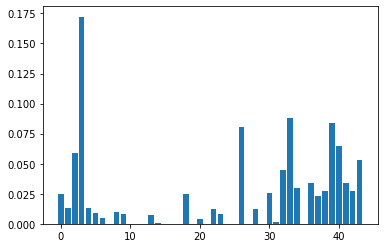

In [25]:
#plot feature importance. Thus, 4th variable(duration) is the most important variable. Correlation matrix also support this argument
from matplotlib import pyplot
pyplot.bar(range(len(fimp.feature_importances_)), fimp.feature_importances_)
pyplot.show()

In [ ]:
#get the confusion matrix. Accuracy rate is (36163+1198)/(36163+1198+941+1698)=0.934025
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, oof_reg_preds1)

array([[36163,   941],
       [ 1698,  1198]])

In [ ]:
#Install catboost for alternative method
!pip3 install catboost

     |████████████████████████████████| 66.3MB 67kB/s 


In [ ]:
#Using optuna, get  best paramater on test data
import catboost as cb
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import optuna


def objective(trial):
    data, target = load_breast_cancer(return_X_y=True)
    train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.2)

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    gbm = cb.CatBoostClassifier(**param)

    gbm.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=0, early_stopping_rounds=100)

    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(valid_y, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=25)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2020-12-02 02:25:59,173] A new study created in memory with name: no-name-05df05ea-d2fd-4145-8001-5ecb9727bb5a
[I 2020-12-02 02:26:08,405] Trial 0 finished with value: 0.9385 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.0244122314162728, 'depth': 9, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.32008426759988784}. Best is trial 0 with value: 0.9385.
[I 2020-12-02 02:26:58,492] Trial 1 finished with value: 0.93825 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.0796774675349423, 'depth': 10, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.9385.
[I 2020-12-02 02:27:27,095] Trial 2 finished with value: 0.934375 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.03246571373503904, 'depth': 5, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.9200027611423188}. Best is trial 0 with value: 0.9385.
[I 2020-12-02 02:27:50,553] Trial 3 finished with value: 0.9

Number of finished trials: 25
Best trial:
  Value: 0.94175
  Params: 
    objective: Logloss
    colsample_bylevel: 0.05262695093702015
    depth: 7
    boosting_type: Ordered
    bootstrap_type: MVS


In [26]:
#Evaluate 5 fold cross validation using catboost technique with parameter obtained from hyperoptimization method 
params={'objective': 'Logloss', 'colsample_bylevel': 0.05262695093702015, 'depth': 7, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import gc
import math
folds = KFold(n_splits=5, shuffle=True, random_state=42)
oof_reg_preds2 = np.zeros(X_train.shape[0])
oof_reg_proba2 = np.zeros(X_train.shape[0])
for n_fold, (trn_idx, val_idx) in enumerate(folds.split(X_train)):
    trn_x, trn_y = X_train.iloc[trn_idx], y_train.iloc[trn_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    cat = CatBoostClassifier(**params,loss_function= 'Logloss')
   
    print("-"* 20 + "Catboost Training" + "-"* 20)
    cat.fit(trn_x, trn_y,eval_set= [ (val_x, val_y)],use_best_model=True,verbose=100)
    
    
    # catboost
    oof_reg_preds2[val_idx] = cat.predict(val_x)  
    oof_reg_proba2[val_idx] = cat.predict_proba(val_x)[:,1]
    
    del cat, trn_x, trn_y, val_x, val_y
    gc.collect()
   
print('Full Train accuracy score %.6f' % accuracy_score(y_train, np.rint(oof_reg_preds2)) )


--------------------Catboost Training--------------------
Learning rate set to 0.07459
0:	learn: 0.6157433	test: 0.6156726	best: 0.6156726 (0)	total: 79.1ms	remaining: 1m 18s
100:	learn: 0.1630318	test: 0.1638107	best: 0.1638107 (100)	total: 3.91s	remaining: 34.8s
200:	learn: 0.1420773	test: 0.1445693	best: 0.1445693 (200)	total: 7.45s	remaining: 29.6s
300:	learn: 0.1340823	test: 0.1388909	best: 0.1388627 (297)	total: 11s	remaining: 25.5s
400:	learn: 0.1294800	test: 0.1365256	best: 0.1365120 (398)	total: 14.4s	remaining: 21.5s
500:	learn: 0.1262141	test: 0.1351160	best: 0.1351160 (500)	total: 17.8s	remaining: 17.8s
600:	learn: 0.1226811	test: 0.1341780	best: 0.1341570 (575)	total: 21.3s	remaining: 14.2s
700:	learn: 0.1195322	test: 0.1333551	best: 0.1333530 (698)	total: 24.8s	remaining: 10.6s
800:	learn: 0.1169927	test: 0.1325180	best: 0.1325151 (799)	total: 28.3s	remaining: 7.02s
900:	learn: 0.1151163	test: 0.1324119	best: 0.1323802 (890)	total: 31.8s	remaining: 3.49s
999:	learn: 0.113

In [27]:
#Full Train accuracy score 0.937825 . Slightly better however correct classification of yes is lower 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, np.rint(oof_reg_preds2))

array([[36370,   734],
       [ 1753,  1143]])

In [28]:
#Another alternative is ensemble method by combining probabilities of two methods
em=(0.25*oof_reg_proba+0.75*oof_reg_proba2)

In [ ]:
#Confusion matrix of ensemble method is given below. In term s of accuracy, it is in the miidle of two classifier. However, correct classification of yes is higher than two classifier.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, np.rint(em))

array([[36229,   875],
       [ 1692,  1204]])